**Lorenzo's Notebook**

Importing useful packages and modules

In [1]:
from data_collector_client import AnomalyDetectionClient
from telethon.tl.types import MessageReactions
import asyncio
from decouple import config
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
import re
def reactions_splitting(message):
    pattern = r"emoticon=['\"](.*?)['\"].*?count=(\d+)"
    matches = re.findall(pattern, message)
    if matches:
        return matches
    else:
        return None

In [3]:

# Function to count the number of reactions in a message using the splitted reactions
def count_reactions(splitted_reaction):
    if(splitted_reaction == None):
        return 0
    else:
        tmp = []
        for i in range(len(splitted_reaction)):
            tmp.append(int(splitted_reaction[:][i][1]))
        return sum(tmp)

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Function to preprocess a message removing stopwords of the specified language and special characters
def preprocess_message(message, language):
  # Removing special characters and \n
  message = re.sub(r"[^\w\s]", "", message)
  message = re.sub(r"\n", "", message)


  # Removing Stopwords
  stop_words = set(stopwords.words(language))
  message = " ".join([word for word in message.split() if word not in stop_words])

  # Convert to lowercase
  message = message.lower()

  # Removing empty words
  message = " ".join(message.split())

  return message

# example
messaggi = ["Ciao a tutti!", "Come va?", "Oggi è una bella giornata\n."]
preprocessed_messages = [preprocess_message(message,"italian") for message in messaggi]
print(preprocessed_messages)


['ciao', 'come va', 'oggi bella giornata']


[nltk_data] Downloading package stopwords to C:\Users\asus-
[nltk_data]     zen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv('trial.csv')

df['reactions'].fillna('', inplace=True)
df['reactions'] = df['reactions'].apply(lambda x: count_reactions(reactions_splitting(x)))

In [6]:
df.loc[df['reactions'] > 0]

,Unnamed: 0,group,sender,text,date,reactions
0,1,https://t.me/+synza2388S80NWM0,5328388801,We can do it online so that everyone could join,2024-03-26 19:35:34+00:00,3
4,1,https://t.me/+synza2388S80NWM0,984447467,I am free from 11:30 to 15:30,2024-03-26 17:23:42+00:00,1
7,1,https://t.me/+synza2388S80NWM0,984447467,NaN,2024-03-25 18:01:09+00:00,1
12,1,https://t.me/+synza2388S80NWM0,984447467,If you react with different reactions to this ...,2024-03-25 16:32:10+00:00,3
14,1,https://t.me/+synza2388S80NWM0,984447467,I guess the csv can be modified once transform...,2024-03-25 16:07:19+00:00,1
25,1,https://t.me/+synza2388S80NWM0,984447467,I can try now,2024-03-25 15:06:50+00:00,1
32,1,https://t.me/+synza2388S80NWM0,382281069,"Yeah,\r\nIt's probably ok. He was very support...",2024-03-25 15:03:15+00:00,1
38,1,https://t.me/+synza2388S80NWM0,984447467,"I asked them where they want to meet, I'll let...",2024-03-25 11:27:43+00:00,1
39,1,https://t.me/+synza2388S80NWM0,984447467,Is tomorrow at 14 ok for you?,2024-03-24 15:51:41+00:00,2
40,1,https://t.me/+synza2388S80NWM0,480675472,https://github.com/facebookresearch/LASER,2024-03-24 10:41:55+00:00,1


**Laser Embedding**

In [9]:
texts = df['text']
preprocessed_texts = [preprocess_message(str(text), "english") for text in texts]
print("-----NORMAL TEXTS-----")
print(texts[0:5])
print("\n-----PREPROCESSED TEXTS-----")
print(preprocessed_texts[0:5])

print(len(preprocessed_texts))
print(len(texts))


-----NORMAL TEXTS-----
0      We can do it online so that everyone could join
1                            I'm ok if we do it online
2                         I'm free but I prefer online
3    What about the other days. I have probably les...
4                        I am free from 11:30 to 15:30
Name: text, dtype: object

-----PREPROCESSED TEXTS-----
['we online everyone could join', 'im ok online', 'im free i prefer online', 'what days i probably less constraint erfanamidi_i martinavigano', 'i free 1130 1530']
55
55


In [46]:
langs = ["en" for i in range(len(texts))]

from laserembeddings import Laser

laser = Laser()

# if all sentences are in the same language:

embeddings = laser.embed_sentences(
    texts,
    lang=langs)

embeddings.shape

(55, 1024)

In [11]:
def plot_reduced_embeddings_2D(texts, lang):
    langs = [lang for i in range(len(texts))]

    from laserembeddings import Laser

    laser = Laser()

    # if all sentences are in the same language:

    embeddings = laser.embed_sentences(
    texts,
    lang=langs)

    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    # Plottare i punti
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

    for i, point in enumerate(reduced_embeddings):
        # Annotate each point with the message number
        plt.annotate(str(i + 1), point, ha='center', va='center')

    plt.show()

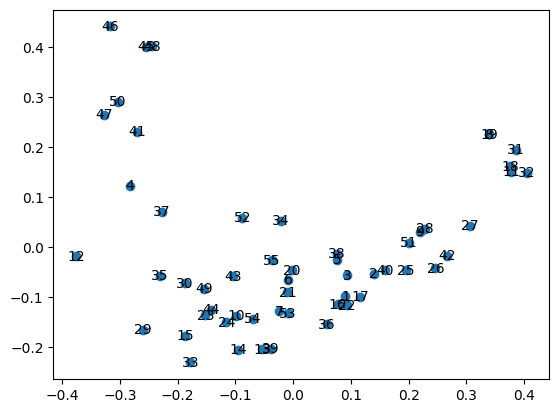

In [12]:
plot_reduced_embeddings_2D(texts, "en")

In [13]:
print("30 : " + texts[30])
print("52 : " + texts[52])
print("51 : " + texts[51])

30 : great
52 : It would be more convenient to set it related to the topic of the project...
51 : TelegramInfromationSpace
AnamolyDetectionBot
InformationSpace
TelegramEventDetection
TelegramAnamolyDetection


Now we use the dataset 'poli_msgs.csv' where there are information about the messages of the polinetwork group 

We'll plot the data as we have done before to see if there is any change in the distribution of the messages of two different groups

In [14]:
polidf = pd.read_csv('poli_msgs.csv')

polidf['reactions'].fillna('', inplace=True)
polidf['reactions'] = polidf['reactions'].apply(lambda x: count_reactions(reactions_splitting(x)))

polidf.head()

,Unnamed: 0,group,sender,msg_id,reply,text,date,reactions
0,1,https://t.me/PoliGruppo,768169879,205531,205529.0,**Here are the groups **:,2024-03-29 13:18:37+00:00,0
1,1,https://t.me/PoliGruppo,825112400,205529,NaN,"Ciao a tutti, dovrei fare l'esame di stato a g...",2024-03-29 13:00:05+00:00,0
2,1,https://t.me/PoliGruppo,768169879,205525,205522.0,**Ecco i gruppi**:,2024-03-29 10:20:47+00:00,0
3,1,https://t.me/PoliGruppo,821857100,205523,205522.0,Non è un gruppo per fare recruiting,2024-03-29 10:19:15+00:00,0
4,1,https://t.me/PoliGruppo,450217695,205522,NaN,Ragazzi Ciao!\r\nCi sono ingegneri strutturist...,2024-03-29 10:15:54+00:00,0


In [15]:
def plot_and_compare_reduced_embeddings_2D(texts1, texts2, lang1, lang2):
    langs1 = [lang1 for i in range(len(texts1))]
    langs2 = [lang2 for i in range(len(texts2))]

    from laserembeddings import Laser

    laser = Laser()
#
    # if all sentences are in the same language:

    embeddings1 = laser.embed_sentences(
    texts1,
    lang=langs1)

    embeddings2 = laser.embed_sentences(
    texts2,
    lang=langs2)

    pca = PCA(n_components=2)
    reduced_embeddings1 = pca.fit_transform(embeddings1)
    pca = PCA(n_components=2)
    reduced_embeddings2 = pca.fit_transform(embeddings2)

    # Plottare i punti
    plt.scatter(reduced_embeddings1[:, 0], reduced_embeddings1[:, 1], c='b')
    plt.scatter(reduced_embeddings2[:, 0], reduced_embeddings2[:, 1], c='r')

    plt.show()

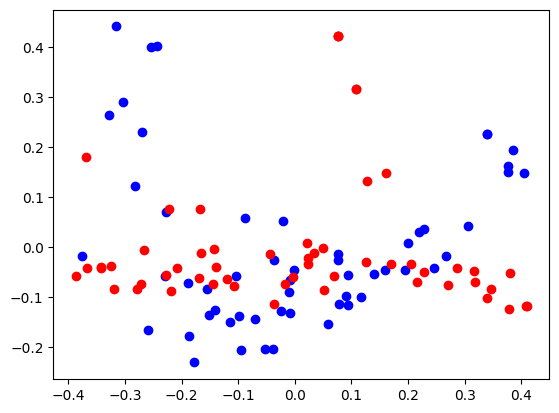

In [16]:
plot_and_compare_reduced_embeddings_2D(texts, polidf['text'], "en", "it")

In [17]:
poli_texts = polidf['text']
poli_texts_strings = [str(text) for text in poli_texts if isinstance(text, str)] 
print(poli_texts[0:5])
print(poli_texts_strings[0:5])



0                            **Here are the groups **:
1    Ciao a tutti, dovrei fare l'esame di stato a g...
2                                   **Ecco i gruppi**:
3                  Non è un gruppo per fare recruiting
4    Ragazzi Ciao!\r\nCi sono ingegneri strutturist...
Name: text, dtype: object
['**Here are the groups **:', "Ciao a tutti, dovrei fare l'esame di stato a giugno di ingegneria industriale, online non ho trovato corsi o consigli su come prepararsi. Qualcuno ha già svolto l'esame? o conosce qualcuno che l'ha fatto?", '**Ecco i gruppi**:', 'Non è un gruppo per fare recruiting', "Ragazzi Ciao!\r\nCi sono ingegneri strutturisti iscritto all'albo qui nel gruppo? \r\nSe sì, o se ne conoscete uno, scrivetemi in privato che ho bisogno per un lavoro."]


Try by plotting in the space

In [18]:
def plot_and_compare_reduced_embeddings_3D(texts1, texts2, lang1, lang2, name1, name2):
    langs1 = [lang1 for i in range(len(texts1))]
    langs2 = [lang2 for i in range(len(texts2))]

    from laserembeddings import Laser

    laser = Laser()

    # if all sentences are in the same language:

    embeddings1 = laser.embed_sentences(
    texts1,
    lang=langs1)

    embeddings2 = laser.embed_sentences(
    texts2,
    lang=langs2)

    pca = PCA(n_components=3)
    reduced_embeddings1 = pca.fit_transform(embeddings1)
    pca = PCA(n_components=3)
    reduced_embeddings2 = pca.fit_transform(embeddings2)

    import plotly.graph_objects as go

    # Importare i dati
    import numpy as np

    # Creare la figura
    fig = go.Figure()

    # Plot each set of points with a unique colormap
    fig.add_scatter3d(
        x=reduced_embeddings1[:, 0],
        y=reduced_embeddings1[:, 1],
        z=reduced_embeddings1[:, 2],
        mode='markers',
        marker=dict(color='blue', size=8),  # Use a color name or hex code for direct coloring
        name=name1
    )

    fig.add_scatter3d(
        x=reduced_embeddings2[:, 0],
        y=reduced_embeddings2[:, 1],
        z=reduced_embeddings2[:, 2],
        mode='markers',
        marker=dict(color='red', size=8),  # Use a different color for this set
        name=name2
    )

    # Aggiungere le legende
    fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

    # Mostrare il plot
    fig.show()

In [19]:
plot_and_compare_reduced_embeddings_3D(texts, poli_texts_strings, "en", "it", "Our Group", "PoliNetwork Group")

Doing the same as before using the preprocessed texts

In [21]:
preprocessed_texts = [preprocess_message(str(text), "english") for text in texts]
poli_preprocessed_texts = [preprocess_message(text, "italian") for text in poli_texts_strings]


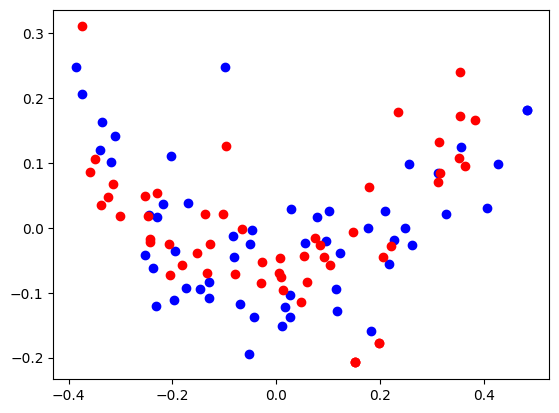

In [ ]:
plot_and_compare_reduced_embeddings_2D(preprocessed_texts, poli_preprocessed_texts, "en", "it")

In [ ]:
plot_and_compare_reduced_embeddings_3D(preprocessed_texts, poli_preprocessed_texts, "en", "it", "Our Group", "PoliNetwork Group")

**Cosine Similarity**

In [27]:

# Define your two sentences
sentence1 = "This is the first sentence."
sentence2 = "This sentence is very similar to the first one."

# Get the LASER embeddings for the sentences
embedding1 = laser.embed_sentences(
  sentence1,
  lang='en')

embedding2 = laser.embed_sentences(
  sentence2,
  lang='en')



# Calculate cosine similarity
import numpy as np
similarity = np.dot(embedding1[0], embedding2[0]) / (np.linalg.norm(embedding1[0]) * np.linalg.norm(embedding2[0]))

# Print the similarity score
print(f"Cosine similarity between sentences: {similarity:.4f}")


Cosine similarity between sentences: 0.7246


In [81]:
#Return the average cosine similarity between the last k embeddings
def average_k_cosine_similarity(embeddings, k):
    tmp_similarity = []
    for i in np.arange(k-1):
        tmp_similarity.append(np.dot(embeddings[k], embeddings[i]) / (np.linalg.norm(embeddings[k]) * np.linalg.norm(embeddings[i])))
    return np.mean(tmp_similarity)

print(len(embeddings))

similarities = average_k_cosine_similarity(embeddings, 5)

55


In [98]:
print(preprocessed_texts[0:5])
prep_text = preprocessed_texts


['we could use namessurnames concatenated', 'somewhat true but would better permission collect analyze data', 'it would convenient set related topic project', 'telegraminfromationspace anamolydetectionbot informationspace telegrameventdetection telegramanamolydetection', 'i vote 4th']


In [99]:
langs = ['en' for i in range(len(preprocessed_texts))]
embeddings2 = laser.embed_sentences(
  prep_text,
  lang=langs)

45


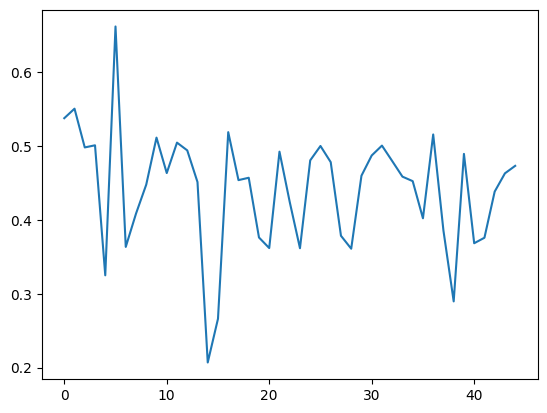

In [100]:
trial_similarities = []
k = 10
for i in np.arange(0, len(embeddings2)-k):
    window = [emb for emb in embeddings2[i:i+k]]
    trial_similarities.append(average_k_cosine_similarity(window, k-1))

print(len(trial_similarities))

# Plot the list
plt.plot(trial_similarities)
plt.show()


In [101]:
def watch_messages_in_a_range(messages, start, end):
    for i in np.arange(start, end+1):
        print(str(i) +" : " + messages[i])

watch_messages_in_a_range(prep_text, 5,15)

5 : httpsgithubcomamirmosiotelegrameventdetection
6 : could send mail github account invite
7 : amidierfangmailcom
8 : httpsgithubcomamirmosiotelegrameventdetectioninvitations
9 : martina2viganomailpolimiit
10 : lorenzomondomailpolimiit
11 : do remember name technique proposed professor classification part or received study material yet
12 : no havent received anything somthing laser embedding
13 : i think
14 : httpsgithubcomfacebookresearchlaser
15 : is tomorrow 14 ok


In [97]:
watch_messages_in_a_range(prep_text, 15,25)

15 : i mean would simpler read
16 : could like reactions 1
17 : perfect
18 : nan
19 : its probably something working directory addresses
20 : actually used run without debugging make sense
21 : i cant understand since code
22 : when i run directly terminal i get problem if i select run without debugging works
23 : wow great can send csv i want see format get
24 : i manage add
25 : i try
